Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных.

# Описание данных

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix




In [ ]:
# Импорт библиотеки pandas
import pandas as pd
# Загрузка датасета user_data в переменную user
user = pd.read_csv('3_user_data.csv', sep=',')
# Загрузка датасета logs в переменную logs
logs = pd.read_csv('3_logs.csv', sep=',')

In [3]:
# Просмотр датасета user_data
user.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
# Просмотр датасета logs в переменную logs
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


# Задание 1 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [14]:
# Вывод количства уникальных значений переменной platform из датасета logs
print(f"Переменная patform из датасета logs принимает {logs['platform'].nunique()} уникальных значения!")

Переменная patform из датасета logs принимает 3 уникальных значения!


# Задание 2

С какой платформы осуществляется наибольшее количество успешных операций? (success == True)


Подсказка: вспомните команды из прошлого занятия 

Название_датафрейма.query('success == True').platform.value_counts()

а еще команда idxmax()

In [ ]:
# Вывод платформы с которой осуществлялось больше всего успешных операций
print(f"Наибольшее количество успешных операций осущетвляется с платформы \
'{logs.query('success==True').platform.value_counts().idxmax()}' в количестве \
{logs.query('success==True').platform.value_counts().max()} операций!")


Наибольшее количество успешных операций осущетвляется с платформы 'phone' в количестве 2019 операций!


# Задание 3

Какой клиент совершил больше всего успешных операций?

Внимание: Несколько пользователей могли совершить одинаковое число успешных действий

Подсказка: вспомните команды из прошлого урока 

Название_датафрейма.query('success == True').client.value_counts()

также поможет команда max()

In [47]:
# Вывод клиентов, которые совершили больше всего успешных операций
success_counts=logs.loc[logs.success==True].client.value_counts()
max_num=success_counts.max()
max_success_users=success_counts.loc[success_counts==max_num]
print(f"Больше всего успешных операций в количестве {max_num}-ой операции были совершены следующими клиентами:\n\
{max_success_users.index}")


Больше всего успешных операций в количестве 41-ой операции были совершены следующими клиентами:
Index([28719, 52870, 61468, 61473, 12179, 82563, 36165, 92584, 78349], dtype='int64', name='client')


# Задание 4

Объедините два датафрейма в один по столбцу 'client'

Подсказка: Название_датафрейма_1.merge(Название_датафрейма_2, on='client')

In [58]:
# Объединение датафреймов logs и user_data в один по столбцу client
print(f"Объединение датафреймов logs и user_data в один по столбцу client имеет следующий вид:")
df=logs.merge(user, on='client')
df

Объединение датафреймов logs и user_data в один по столбцу client имеет следующий вид:


,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


# Задание 5

Какая платформа наиболее популярна среди премиумных клиентов? (premium == True)

In [70]:
# Вывод платформы, которая является самой популярной сред премиумных клиентов
print(f"Самой популярной платформой среди премиумных клиентов является платформа \
'{df.query('premium==True').platform.value_counts().idxmax()}', которую использовали \
{df.query('premium==True').platform.value_counts().max()} раз.")

Самой популярной платформой среди премиумных клиентов является платформа 'phone', которую использовали 246 раз.


# Задание 6

Сделайте выборку для премиальных клиентов (premium` == True) и для непримеальных.

На основе этих выборок постройте графики, первый - отображающий популярность использования различных платформ (столбец "platform") у премиальных пользователей и второй - платформы сради непримиальных пользователей. 

Подсказка: используйте sns.countplot(x=название_выборки["столбец"])

In [72]:
# Выборка для премиальных клиентов
premium=df.query('premium==True')
premium

,client,success,platform,time,premium,age
1,35604,False,phone,1585459894,True,65
8,11983,True,phone,1585459511,True,68
11,99308,True,computer,1585409409,True,38
18,49625,False,phone,1585447789,True,65
23,53978,True,computer,1585408637,True,46
...,...,...,...,...,...,...
3366,20278,True,computer,1585456706,True,65
3394,78455,True,phone,1585459854,True,23
3396,57026,True,computer,1585438120,True,62
3417,2864,True,phone,1585459818,True,41


In [73]:
# Выборка для непремиальных клиентов
none_premium=df.query('premium==False')
none_premium

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
5,32167,True,computer,1585457972,False,42
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


<Axes: xlabel='platform', ylabel='count'>

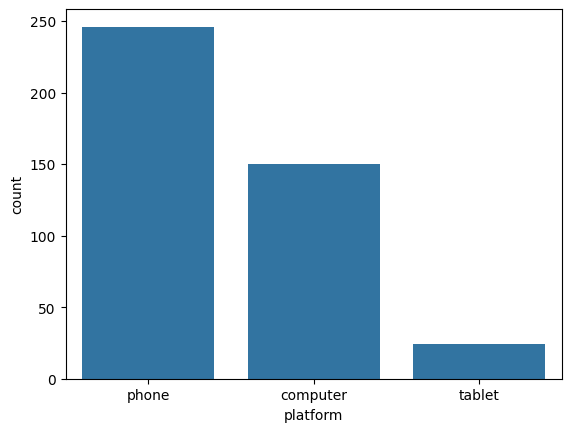

In [77]:
# Импорт библиотеки seaborn
import seaborn as sns
# Построение графика использования платформ среди премиальных пользователей
sns.countplot(x=premium["platform"])

<Axes: xlabel='platform', ylabel='count'>

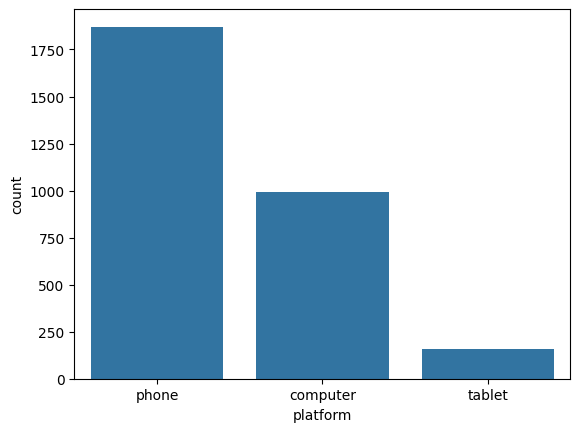

In [78]:
# Построение графика использования платформ среди непремиальных пользователей
sns.countplot(x=none_premium["platform"])

# Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 

Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Подсказка: sns.countplot(data=Название_Датафрейма.loc[(Название_Датафрейма.platform == 'computer')
                                   & (Название_Датафрейма.success == True)], x='age')

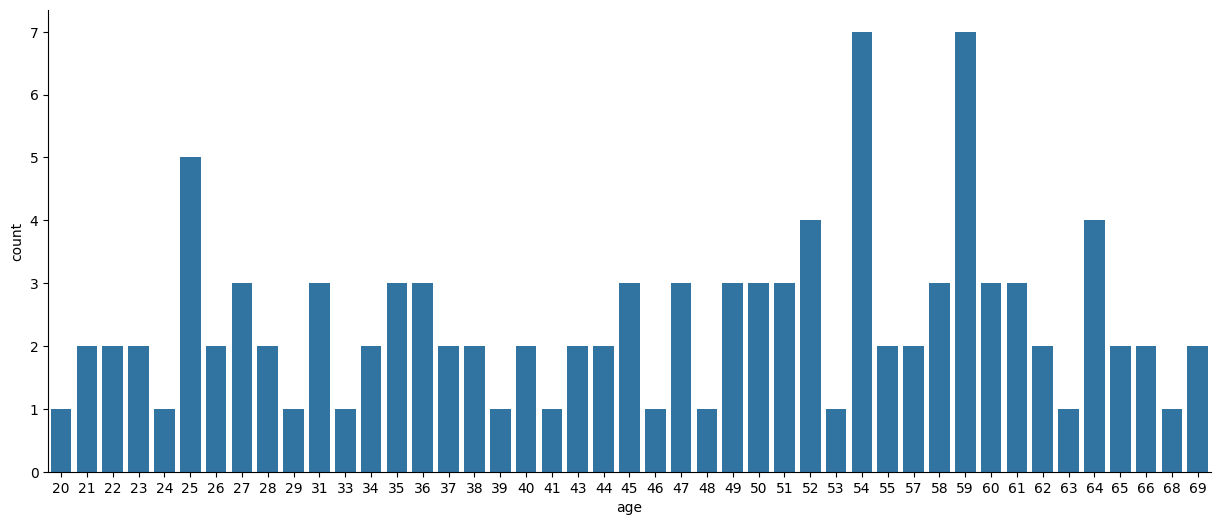

In [94]:
# Импортируем библиотеку matplotlib.pyplot
import matplotlib.pyplot as plt
# Изменяем размер графика
plt.figure(figsize=(15,6))
# Визуализируем число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot.
# По оси x - возраст, по оси y - число успешных операций.
sns.countplot(x='age',data=premium.loc[(premium.platform=='computer')&(premium.success==True)])
# Удаляем правую и верхнюю границу графика (по умолчанию)
sns.despine()
